# Classification of the MNIST dataset using convolutional neural networks (CNNs)
*Nicola Piovesan, 2020*

This jupyter notebook shows an example of application of __convolutional neural networks (CNNs)__ to perform image classification. In particular, this powerful machine learning tool is applied to the famous MNIST dataset, which contains handwritten digits. The CNN implemented here allows __reaching a 99% classification accuracy__.

In [0]:
# import the needed libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# The MNIST dataset

The MNIST dataset contains __60,000 training images__and __10,000 testing images__. The images have dimension 28x28 pixels and they are in gray scale (i.e., each pixel takes values in [0,255]). 

In [0]:
# Import the training and validation sets
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

The following picture shows the first 16 images contained in the training set.

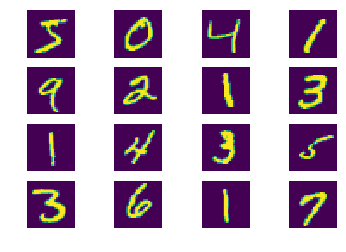

In [3]:
for i in range(0,16):
  plt.subplot(4,4,i+1)
  plt.imshow(x_train[i,:,:])
  plt.axis('off');

Some __preprocessing__ is needed. In particular, we need to:
 
1.   __reshape__ the images matrices to have a tensor of dimension 28x28x1 that will be the input of the CNN;
2.   __normalize__ the tensor elements to take values in [0,1];
3.   map the label value to a __one-hot-encoding vector__ that will be the output of the CNN.

In [0]:
# reshape
x_train2=x_train.reshape((60000,28,28,1))
x_test2=x_test.reshape((10000,28,28,1))
# normalize
x_train2=x_train2.astype('float32')/255
x_test2=x_test2.astype('float32')/255
# one-hot encoding
y_train2=to_categorical(y_train)
y_test2=to_categorical(y_test)

# Design of the convolutional neural network

In the following, we design the CNN and we show a summary of its architecture.

In [5]:
model = Sequential()
model.add(Conv2D(32,(3,3),strides=1,padding='same',activation='relu',input_shape=(28,28,1)))
model.add(Dropout(0.25))
model.add(MaxPooling2D((2,2),strides=2))
model.add(Conv2D(64,(3,3),strides=1,padding='same',activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D((2,2),strides=2))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
dropout (Dropout)            (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0

The CNN is then compiled. We use the __stochastic gradient descent__ optimizer and the goal is to minimize the __categorical crossentropy__.

In [0]:
model.compile(optimizer='sgd',metrics=['accuracy'],loss='categorical_crossentropy')

## Training of the CNN model

The CNN is then trained for 50 epochs using a batch of size 100.

In [7]:
history=model.fit(x_train2,y_train2,validation_data=(x_test2,y_test2),batch_size=100,epochs=50,verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 8s 134us/sample - loss: 0.8817 - accuracy: 0.7287 - val_loss: 0.4331 - val_accuracy: 0.9110
Epoch 2/50
60000/60000 [==============================] - 6s 107us/sample - loss: 0.2991 - accuracy: 0.9104 - val_loss: 0.2827 - val_accuracy: 0.9439
Epoch 3/50
60000/60000 [==============================] - 6s 106us/sample - loss: 0.2230 - accuracy: 0.9323 - val_loss: 0.2274 - val_accuracy: 0.9557
Epoch 4/50
60000/60000 [==============================] - 6s 106us/sample - loss: 0.1848 - accuracy: 0.9435 - val_loss: 0.1778 - val_accuracy: 0.9647
Epoch 5/50
60000/60000 [==============================] - 6s 106us/sample - loss: 0.1584 - accuracy: 0.9518 - val_loss: 0.1593 - val_accuracy: 0.9681
Epoch 6/50
60000/60000 [==============================] - 6s 106us/sample - loss: 0.1403 - accuracy: 0.9583 - val_loss: 0.1349 - val_accuracy: 0.9732
Epoch 7/50
60000/60000 [==========================

The following two graphs show how the __accuracy__ and __loss__ measures evolves while training the network.

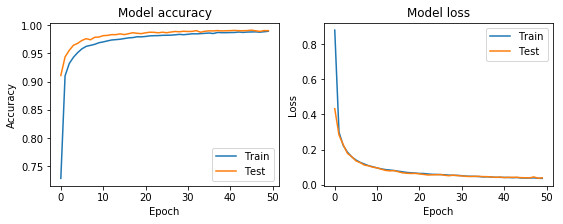

In [8]:
# Plot training & validation accuracy values
plt.figure(figsize=(9,3))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.subplot(1,2,2)
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right');

# Results
The CNN trained for 50 epochs already returns pretty good classification performance. 

In [9]:
(v_l,v_a)=model.evaluate(x_test2,y_test2)
print("Validation loss: %.2f, Validation accuracy: %.2f" %(v_l,v_a))

10000/10000 [==============================] - 1s 128us/sample - loss: 0.0381 - accuracy: 0.9905
Validation loss: 0.04, Validation accuracy: 0.99


The following example shows the result of the classification of three digits. The input images are shown in the left column, whereas the right column shows the output probability $P(N)$ where $N$ is the label (i.e. the digit).

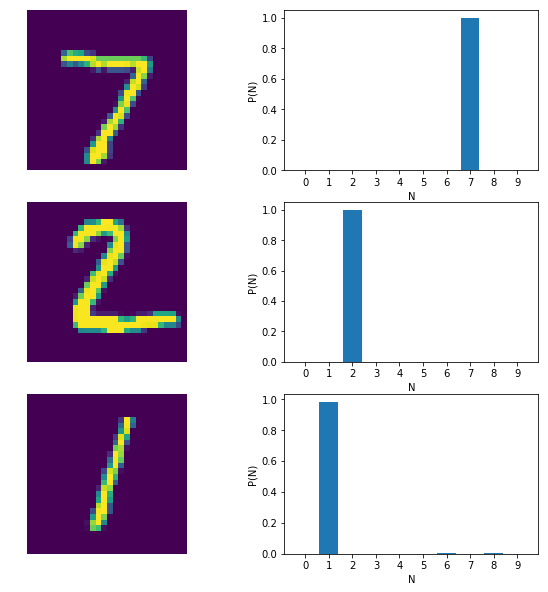

In [10]:
plt.figure(figsize=(10,10))
for i in range(3):
  x=x_test2[i,:,:,:].reshape((1,28,28,1))
  y=y_test2[i]
  res=model.predict(x)
  plt.subplot(3,2,2*i+1)
  plt.imshow(x_test2[i,:,:,0])
  plt.axis('off')
  plt.subplot(3,2,2*i+2)
  plt.bar(np.r_[0:10],res[0])
  plt.xticks(np.r_[0:10],np.r_[0:10]);
  plt.ylabel('P(N)')
  plt.xlabel('N')